# Test Notebook Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('C:\\Users\\philipp\\Desktop\\github\\temporal-graphs-neo\\models\\files_for_model\\ufz_all_formulas_raw.csv', sep=';')

## Test functions here

In [108]:
df_meta = pd.read_csv('C:\\Users\\philipp\\Desktop\\github\\temporal-graphs-neo\\models\\files_for_model\\sample_metadata.csv', sep=',')
df_raw = pd.read_csv('C:\\Users\\philipp\\Desktop\\github\\temporal-graphs-neo\\models\\files_for_model\\ufz_all_formulas_raw.csv', sep=';')

       number  number_perc  occ     occ_full  occ_full_perc
count                                                      
1        6495    34.325124    1   499.615385       5.868322
2        1779     9.401755    2   273.692308       3.214702
3        1109     5.860903    3   255.923077       3.005990
4         841     4.444562    4   258.769231       3.039420
5         594     3.139203    5   228.461538       2.683436
6         575     3.038791    6   265.384615       3.117122
7         502     2.652997    7   270.307692       3.174947
8         453     2.394039    8   278.769231       3.274334
9         469     2.478596    9   324.692308       3.813732
10        473     2.499736   10   363.846154       4.273620
11        533     2.816827   11   451.000000       5.297301
12        724     3.826234   12   668.307692       7.849728
13       4375    23.121235   13  4375.000000      51.387345
18922


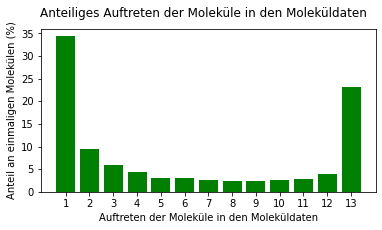

In [3]:
# Häufigkeit von Molekülauftreten x Anteil an Gesamtmenge 

df_only = df.groupby(df['formula_string'], as_index=False).aggregate({'formula_string': 'count'})
df_only.columns = ['count']
df_only= df_only.groupby(df_only['count']).aggregate({'count': 'count'})
df_only.columns = ['number']
df_only['number_perc'] = df_only['number']/df_only['number'].sum()*100
df_only['occ'] = [1,2,3,4,5,6,7,8,9,10,11,12,13]
df_only['occ_full'] = df_only['number']*df_only['occ']/13
df_only['occ_full_perc'] = df_only['occ_full']/df_only['occ_full'].sum()*100
print(df_only)
print(df_only.number.sum())

plt.figure(figsize=(6, 3))
plt.suptitle('Anteiliges Auftreten der Moleküle in den Moleküldaten')
plt.bar(df_only['occ'], df_only['number_perc'], color = 'g')
plt.xlabel('Auftreten der Moleküle in den Moleküldaten')
plt.ylabel('Anteil an einmaligen Molekülen (%)')
x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.xticks(x)

specific = 'abb_032_vorkommen'
plt.savefig(path_file + specific + '.pdf', bbox_inches='tight')

plt.show()

0.12101889999999996
                peak_relint_tic  occ  soll      diff
measurement_id                                      
7803                   1.127515    0     1  0.127515
7809                   1.133363    1     1  0.133363
7815                   1.140848    2     1  0.140848
7821                   1.135187    3     1  0.135187
7827                   1.117656    4     1  0.117656
7833                   1.121089    5     1  0.121089
7839                   1.124651    6     1  0.124651
7845                   1.133387    7     1  0.133387
7851                   1.105501    8     1  0.105501
7857                   1.111195    9     1  0.111195
7863                   1.119506   10     1  0.119506
7868                   1.115276   11     1  0.115276
7874                   1.088071   12     1  0.088071


NameError: name 'path_file' is not defined

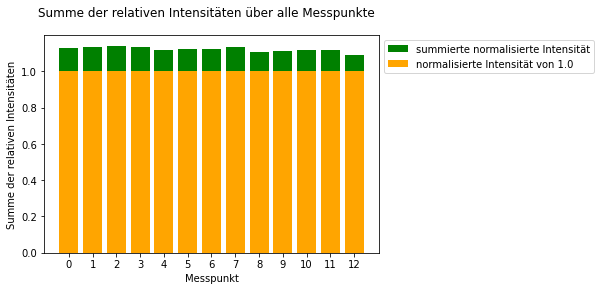

In [3]:
# Summe der relativen Intensitäten

af = {'peak_relint_tic': 'sum'}
df_gesamt = df.groupby(df['measurement_id']).aggregate(af)
df_gesamt['occ'] = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df_gesamt['soll'] = [1,1,1,1,1,1,1,1,1,1,1,1,1]
df_gesamt['diff'] = df_gesamt['peak_relint_tic']-df_gesamt['soll']
print(df_gesamt['diff'].mean())
print(df_gesamt)

plt.suptitle('Summe der relativen Intensitäten über alle Messpunkte')
plt.bar(df_gesamt.occ, df_gesamt.peak_relint_tic, color='green')
plt.bar(df_gesamt.occ, df_gesamt.soll, color='orange')
#plt.bar(df_gesamt.occ, df_gesamt['diff'], color='green')
plt.xlabel('Messpunkt')
plt.ylabel('Summe der relativen Intensitäten')
plt.legend(['summierte normalisierte Intensität', 'normalisierte Intensität von 1.0'], loc='upper left', bbox_to_anchor=(1, 1))
x = [0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(x)
specific = 'abb_072_summe_int'
plt.savefig(path_file + specific + '.pdf', bbox_inches='tight')
plt.show()


    measurement_id  peak_intensity  peak_relint_tic  time
0             7803    1.115693e+07         1.127515     1
1             7809    1.105091e+07         1.133363     2
2             7815    1.220249e+07         1.140848     3
3             7821    1.361344e+07         1.135187     4
4             7827    1.293036e+07         1.117656     5
5             7833    1.310923e+07         1.121089     6
6             7839    1.430086e+07         1.124651     7
7             7845    1.288274e+07         1.133387     8
8             7851    1.396747e+07         1.105501     9
9             7857    1.435091e+07         1.111195    10
10            7863    1.711296e+07         1.119506    11
11            7868    1.775331e+07         1.115276    12
12            7874    1.859392e+07         1.088071    13


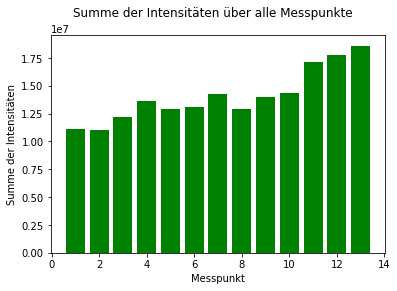

In [7]:
# Summe der Intensitäten

test = {'peak_intensity': 'mean', 'peak_relint_tic': 'sum'}
df_int_sum = df.groupby(df['measurement_id'], as_index=False).aggregate(test)
df_int_sum['time'] = [1,2,3,4,5,6,7,8,9,10,11,12,13]
print(df_int_sum)

plt.suptitle('Summe der Intensitäten über alle Messpunkte')
plt.bar(df_int_sum.time, df_int_sum.peak_intensity, color='green')
plt.xlabel('Messpunkt')
plt.ylabel('Summe der Intensitäten')

#specific = 'abb_032_vorkommen'
#plt.savefig(path_file + specific + '.pdf', bbox_inches='tight')

plt.show()

                formula_string  peak_intensity  occurrence_count  \
formula_string                                                     
C10 H10 N2 O12  C10 H10 N2 O12    2.201280e+06               1.0   
C10 H10 N2 O2    C10 H10 N2 O2    2.171941e+06               5.0   
C10 H10 N2 O3    C10 H10 N2 O3    3.237327e+06               7.0   
C10 H10 N2 O4    C10 H10 N2 O4    4.600443e+06              11.0   
C10 H10 N2 O5    C10 H10 N2 O5    4.139333e+06              13.0   
...                        ...             ...               ...   
C9 H9 N5 O2 S2  C9 H9 N5 O2 S2    2.422580e+06               1.0   
C9 H9 N5 O3 S2  C9 H9 N5 O3 S2    2.195747e+06               2.0   
C9 H9 N5 O4 S1  C9 H9 N5 O4 S1    2.093232e+06               1.0   
C9 H9 N5 O4 S2  C9 H9 N5 O4 S2    2.170079e+06               3.0   
C9 H9 N5 O5 S2  C9 H9 N5 O5 S2    2.313568e+06               1.0   

                peak_relint_tic  
formula_string                   
C10 H10 N2 O12         0.000025  
C10 H10 N2 O2

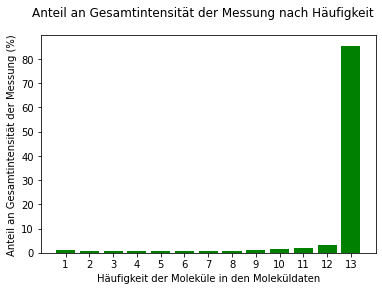

In [8]:
# Anteil an Gesamtintensität nach Molekülauftreten

af = {'formula_string': 'first', 'peak_intensity': 'mean', 'occurrence_count': 'mean', 'peak_relint_tic': 'sum'}
df_int = df.groupby(df['formula_string']).aggregate(af)

print(df_int)

af2 = {'peak_intensity': 'mean', 'occurrence_count': 'first', 'peak_relint_tic': 'sum'}
df_int = df_int.groupby(df_int['occurrence_count']).aggregate(af2)

df_int['peak_relint_tic'] = df_int.peak_relint_tic/13
df_int['int_tic_norm'] = df_int.peak_relint_tic/df_int.peak_relint_tic.sum()*100
print(df_int)
#print(df_int.peak_relint_tic.sum())

plt.suptitle('Anteil an Gesamtintensität der Messung nach Häufigkeit')
plt.bar(df_int.occurrence_count, df_int.int_tic_norm, color='green')
plt.xlabel('Häufigkeit der Moleküle in den Moleküldaten')
plt.ylabel('Anteil an Gesamtintensität der Messung (%)')
x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.xticks(x)



specific = 'abb_038_auftreten'
plt.savefig(path_file + specific + '.pdf', bbox_inches='tight')

plt.show()

In [82]:
df_0 = df[df['measurement_id'] == 7803]
df_1 = df[df['measurement_id'] == 7809]
df_2 = df[df['measurement_id'] == 7815]
df_3 = df[df['measurement_id'] == 7821]
df_4 = df[df['measurement_id'] == 7827]
df_5 = df[df['measurement_id'] == 7833]
df_6 = df[df['measurement_id'] == 7839]
df_7 = df[df['measurement_id'] == 7845]
df_8 = df[df['measurement_id'] == 7851]
df_9 = df[df['measurement_id'] == 7857]
df_10 = df[df['measurement_id'] == 7863]
df_11 = df[df['measurement_id'] == 7868]
df_12 = df[df['measurement_id'] == 7874]

af = {'occurrence_count': 'first', 'peak_relint_tic': 'sum'}
df_int = df.groupby(df['measurement_id'], as_index=False).aggregate(af)
print(df_int)

df_int_0['norm'] = df_int_0.peak_relint_tic/df_int_0.peak_relint_tic.sum()
df_int_1 = df_1.groupby(df_1['occurrence_count'], as_index=False).aggregate(af)
df_int_2 = df_2.groupby(df_2['occurrence_count'], as_index=False).aggregate(af)
df_int_3 = df_3.groupby(df_3['occurrence_count'], as_index=False).aggregate(af)
df_int_4 = df_4.groupby(df_4['occurrence_count'], as_index=False).aggregate(af)
df_int_5 = df_5.groupby(df_5['occurrence_count'], as_index=False).aggregate(af)
df_int_6 = df_6.groupby(df_6['occurrence_count'], as_index=False).aggregate(af)
df_int_7 = df_7.groupby(df_7['occurrence_count'], as_index=False).aggregate(af)
df_int_8 = df_8.groupby(df_8['occurrence_count'], as_index=False).aggregate(af)
df_int_9 = df_9.groupby(df_9['occurrence_count'], as_index=False).aggregate(af)
df_int_10 = df_10.groupby(df_10['occurrence_count'], as_index=False).aggregate(af)
df_int_11 = df_11.groupby(df_11['occurrence_count'], as_index=False).aggregate(af)
df_int_12 = df_12.groupby(df_12['occurrence_count'], as_index=False).aggregate(af)

#print(df_int_0)

    measurement_id  occurrence_count  peak_relint_tic
0             7803                13         1.127515
1             7809                13         1.133363
2             7815                 6         1.140848
3             7821                13         1.135187
4             7827                13         1.117656
5             7833                 9         1.121089
6             7839                13         1.124651
7             7845                13         1.133387
8             7851                13         1.105501
9             7857                13         1.111195
10            7863                13         1.119506
11            7868                13         1.115276
12            7874                 2         1.088071


              formula_class  peak_intensity  peak_relint_tic  intensity_norm
formula_class                                                               
CHN                     CHN    7.981322e+07         0.000762        0.005232
CHNO                   CHNO    1.723514e+10         1.208552        8.292951
CHNOS                 CHNOS    4.171118e+10         3.024868       20.756311
CHNS                   CHNS    1.418512e+09         0.100813        0.691767
CHO                     CHO    8.325318e+10         9.511149       65.264454
CHOS                   CHOS    1.077834e+10         0.720024        4.940728
CHS                     CHS    2.400997e+08         0.006836        0.046906
other                 other    2.662511e+07         0.000240        0.001650


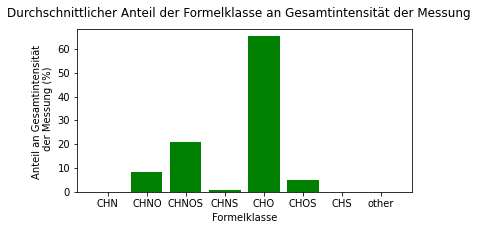

In [5]:
# Verteilung der Molekülklassen

test = {'formula_string': 'first', 'formula_class': 'first', 'peak_intensity': 'mean', 'peak_relint_tic': 'sum'}
df_class = df.groupby(df['formula_string']).aggregate(test)
af = {'formula_class': 'first', 'peak_intensity': 'sum', 'peak_relint_tic': 'sum'}
df_class = df_class.groupby(df_class['formula_class']).aggregate(af)
df_class['intensity_norm'] =  df_class.peak_relint_tic/df_class.peak_relint_tic.sum()*100
print(df_class)

plt.figure(figsize=(6, 3))
plt.suptitle('Durchschnittlicher Anteil der Formelklasse an Gesamtintensität der Messung')
plt.bar(df_class.formula_class, df_class.intensity_norm, color='green')
plt.xlabel('Formelklasse')
plt.ylabel('Anteil an Gesamtintensität \n der Messung (%)')

specific = 'abb_037_klasse_old'
#plt.savefig(path_file + specific + '.pdf', bbox_inches='tight')

plt.show()

  formula_class        form_class        occ
          first  count                      
0           CHN     34        CHN   0.030719
1          CHNO  21461       CHNO  19.390309
2         CHNOS  40539      CHNOS  36.627545
3          CHNS   1955       CHNS   1.766369
4           CHO  39042        CHO  35.274984
5          CHOS   7462       CHOS   6.742020
6           CHS    174        CHS   0.157211
7         other     12      other   0.010842


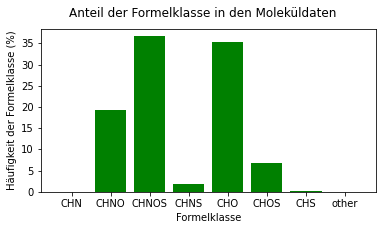

In [7]:
test = {'formula_class': ['first','count']}
df_class = df.groupby(df['formula_class'], as_index=False).aggregate(test)
df_class_new = df_class
df_class_new['form_class'] = df_class.formula_class['first']
df_class_new['occ'] = df_class.formula_class['count']/df_class.formula_class['count'].sum()*100
print(df_class_new)

plt.figure(figsize=(6, 3))
plt.suptitle('Anteil der Formelklasse in den Moleküldaten')
plt.bar(df_class_new.form_class, df_class_new.occ, color='green')
plt.xlabel('Formelklasse')
plt.ylabel('Häufigkeit der Formelklasse (%)')

specific = 'abb_037_klasse'
plt.savefig(path_file + specific + '.pdf', bbox_inches='tight')

plt.show()

7803
6652
1.027673447
7809
6601
1.02826656
7815
6978
1.036850636
7821
7356
1.0228799610000001
7827
6927
1.017774519
7833
7067
1.018417915
7839
7493
1.0135578120000002
7845
6833
1.0321665139999998
7851
7444
1.016980669
7857
7572
1.02057833
7863
8457
1.024138288
7868
8657
1.029095516
7874
8685
1.012629066
[16, 42, 74, 116, 168, 229, 301, 390, 498, 630, 795, 1004, 1267, 1599, 2010, 2525, 3175, 4016, 5128, 6652]
[17, 43, 77, 119, 171, 231, 303, 392, 500, 632, 798, 1004, 1265, 1593, 1998, 2510, 3162, 3997, 5100, 6601]
[16, 43, 78, 121, 172, 233, 304, 391, 496, 625, 787, 990, 1248, 1572, 1983, 2501, 3174, 4063, 5267, 6978]
[18, 45, 79, 119, 167, 224, 291, 372, 473, 600, 763, 967, 1228, 1554, 1965, 2493, 3187, 4119, 5420, 7356]
[20, 49, 82, 122, 168, 223, 288, 367, 465, 588, 743, 937, 1184, 1495, 1887, 2391, 3046, 3934, 5155, 6927]
[20, 48, 82, 122, 168, 222, 287, 364, 462, 585, 744, 941, 1193, 1509, 1907, 2416, 3082, 3981, 5232, 7067]
[21, 49, 82, 122, 170, 225, 292, 372, 474, 603, 764, 969,

C:\Users\philipp\AppData\Local\Temp/ipykernel_11808/3254007151.py:152: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0, help_ls[1]], [l_part[1], l_part[1]], 'k-', lw=1, linestyle='--')
C:\Users\philipp\AppData\Local\Temp/ipykernel_11808/3254007151.py:153: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([help_ls[1], help_ls[1]], [l_part[0], l_part[1]], 'k-', lw=1, linestyle='--')
C:\Users\philipp\AppData\Local\Temp/ipykernel_11808/3254007151.py:155: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot([0, help_ls[4]], [l_part[4], l_part[4]], 'k-', lw=1, linestyle='--')
C:\Users\philipp\AppData\Local\

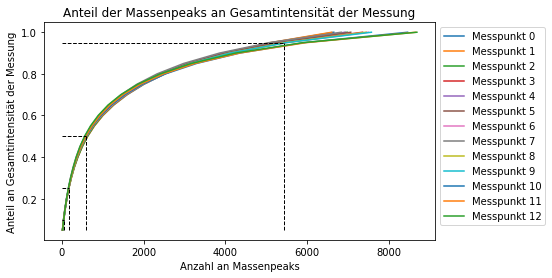

In [11]:
df_teil = df.drop_duplicates(subset=['peak_id'])
df_teil = df_teil[['measurement_id', 'peak_relint_tic', 'formula_string']]
#print(df_teil)

def calc_mass(mid):
    print(mid)
    df_part = df_teil[df_teil['measurement_id'] == mid]
    df_part = df_part.sort_values(by='peak_relint_tic', ascending=False).reset_index(drop=True)
    print(df_part.peak_relint_tic.count())
    print(df_part.peak_relint_tic.sum())
    
    l0 = []
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    l7 = []
    l8 = []
    l9 = []
    l10 = []
    l11 = []
    l12 = []
    l13 = []
    l14 = []
    l15 = []
    l16 = []
    l17 = []
    l18 = []
    l19 = []
    l_erg = []
    
    summe = 0
    for row in df_part.itertuples():
        if summe <= 0.05*df_part.peak_relint_tic.sum():
            l0.append(row.formula_string)
        if summe <= 0.1*df_part.peak_relint_tic.sum():
            l1.append(row.formula_string)
        if summe <= 0.15*df_part.peak_relint_tic.sum():
            l2.append(row.formula_string)
        if summe <= 0.2*df_part.peak_relint_tic.sum():
            l3.append(row.formula_string)
        if summe <= 0.25*df_part.peak_relint_tic.sum():
            l4.append(row.formula_string)
        if summe <= 0.3*df_part.peak_relint_tic.sum():
            l5.append(row.formula_string)
        if summe <= 0.35*df_part.peak_relint_tic.sum():
            l6.append(row.formula_string)
        if summe <= 0.4*df_part.peak_relint_tic.sum():
            l7.append(row.formula_string)
        if summe <= 0.45*df_part.peak_relint_tic.sum():
            l8.append(row.formula_string)
        if summe <= 0.5*df_part.peak_relint_tic.sum():
            l9.append(row.formula_string)
        if summe <= 0.55*df_part.peak_relint_tic.sum():
            l10.append(row.formula_string)
        if summe <= 0.6*df_part.peak_relint_tic.sum():
            l11.append(row.formula_string)
        if summe <= 0.65*df_part.peak_relint_tic.sum():
            l12.append(row.formula_string)
        if summe <= 0.7*df_part.peak_relint_tic.sum():
            l13.append(row.formula_string)
        if summe <= 0.75*df_part.peak_relint_tic.sum():
            l14.append(row.formula_string)
        if summe <= 0.8*df_part.peak_relint_tic.sum():
            l15.append(row.formula_string)
        if summe <= 0.85*df_part.peak_relint_tic.sum():
            l16.append(row.formula_string)
        if summe <= 0.9*df_part.peak_relint_tic.sum():
            l17.append(row.formula_string)
        if summe <= 0.95*df_part.peak_relint_tic.sum():
            l18.append(row.formula_string)
        if summe <= 1*df_part.peak_relint_tic.sum():
            l19.append(row.formula_string)
        summe = summe + row.peak_relint_tic
    
    l_erg.append(len(l0))
    l_erg.append(len(l1))
    l_erg.append(len(l2))
    l_erg.append(len(l3))
    l_erg.append(len(l4))
    l_erg.append(len(l5))
    l_erg.append(len(l6))
    l_erg.append(len(l7))
    l_erg.append(len(l8))
    l_erg.append(len(l9))
    l_erg.append(len(l10))
    l_erg.append(len(l11))
    l_erg.append(len(l12))
    l_erg.append(len(l13))
    l_erg.append(len(l14))
    l_erg.append(len(l15))
    l_erg.append(len(l16))
    l_erg.append(len(l17))
    l_erg.append(len(l18))
    l_erg.append(len(l19))
    
    return l_erg
        
t0 = calc_mass(7803)
t1 = calc_mass(7809)
t2 = calc_mass(7815)
t3 = calc_mass(7821)
t4 = calc_mass(7827)
t5 = calc_mass(7833)
t6 = calc_mass(7839)
t7 = calc_mass(7845)
t8 = calc_mass(7851)
t9 = calc_mass(7857)
t10 = calc_mass(7863)
t11 = calc_mass(7868)
t12 = calc_mass(7874)

print(t0)
print(t1)
print(t2)
print(t3)
print(t4)
print(t5)
print(t6)
print(t7)
print(t8)
print(t9)
print(t10)
print(t11)
print(t12)
help_ls = [(a+b+c+d+e+f+g+h+i+j+k+l+m) / 13 for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(t0, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12)]
print(help_ls)
#print([(a+b+c+d+e+f+g+h+i+j+k+l+m) / 13 for a,b,c,d,e,f,g,h,i,j,k,l,m in zip(t0, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12)])

l_part = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

plt.figure(figsize=(7, 4))
plt.title('Anteil der Massenpeaks an Gesamtintensität der Messung')
plt.xlabel("Anzahl an Massenpeaks")
plt.ylabel("Anteil an Gesamtintensität der Messung")
plt.plot(t0, l_part)
plt.plot(t1, l_part)
plt.plot(t2, l_part)
plt.plot(t3, l_part)
plt.plot(t4, l_part)
plt.plot(t5, l_part)
plt.plot(t6, l_part)
plt.plot(t7, l_part)
plt.plot(t8, l_part)
plt.plot(t9, l_part)
plt.plot(t10, l_part)
plt.plot(t11, l_part)
plt.plot(t12, l_part)

plt.plot([0, help_ls[1]], [l_part[1], l_part[1]], 'k-', lw=1, linestyle='--')
plt.plot([help_ls[1], help_ls[1]], [l_part[0], l_part[1]], 'k-', lw=1, linestyle='--')

plt.plot([0, help_ls[4]], [l_part[4], l_part[4]], 'k-', lw=1, linestyle='--')
plt.plot([help_ls[4], help_ls[4]], [l_part[0], l_part[4]], 'k-', lw=1, linestyle='--')

plt.plot([0, help_ls[9]], [l_part[9], l_part[9]], 'k-', lw=1, linestyle='--')
plt.plot([help_ls[9], help_ls[9]], [l_part[0], l_part[9]], 'k-', lw=1, linestyle='--')

plt.plot([0, help_ls[18]], [l_part[18], l_part[18]], 'k-', lw=1, linestyle='--')
plt.plot([help_ls[18], help_ls[18]], [l_part[0], l_part[18]], 'k-', lw=1, linestyle='--')
plt.legend(['Messpunkt 0', 'Messpunkt 1', 'Messpunkt 2', 'Messpunkt 3', 'Messpunkt 4', 'Messpunkt 5', 'Messpunkt 6', 'Messpunkt 7', 'Messpunkt 8', 'Messpunkt 9', 'Messpunkt 10', 'Messpunkt 11', 'Messpunkt 12'], loc='upper left', bbox_to_anchor=(1, 1))

specific = 'abb_076_anteil_gesamtint'
plt.savefig(path_file + specific + '.pdf', bbox_inches='tight')

plt.show()

In [4]:
af = {'occurrence_count': 'mean', 'peak_relint_tic': ['first', 'last'], 'peak_intensity': ['first', 'last']}
df_check = df.groupby(df['formula_string'], as_index=False).aggregate(af)
#df_check['calc'] = df_check.peak_relint_tic.last - df_check.peak_relint_tic.first
df_check_relint = df_check[df_check.peak_relint_tic['last'] > df_check.peak_relint_tic['first']]
df_check_abs = df_check[df_check.peak_intensity['last'] > df_check.peak_intensity['first']]

df_check_abs

formula_string occurrence_count peak_relint_tic            \
                                 mean           first      last   
3      C10 H10 N2 O4               11        0.000041  0.000040   
4      C10 H10 N2 O5               13        0.000032  0.000036   
5      C10 H10 N2 O6                7        0.000035  0.000027   
16       C10 H10 O10                2        0.000020  0.000015   
17        C10 H10 O2               13        0.000068  0.000113   
...              ...              ...             ...       ...   
18906    C9 H9 N1 O4               13        0.000073  0.000066   
18907    C9 H9 N1 O5               13        0.000075  0.000064   
18908    C9 H9 N1 O6               13        0.000045  0.000037   
18910    C9 H9 N1 O7                4        0.000019  0.000017   
18913    C9 H9 N3 O7                3        0.000027  0.000015   

      peak_intensity              
               first        last  
3          3072363.5   6823349.5  
4          2386528.8   6032151.0  
5          2591791.8   4577210.0  
16         2060453.4   2398847.5  
17         5060250.5  19058376.0  
...              ...         ...  
18906      5471575.5  11088927.0  
18907      5594747.5  10887240.0  
18908      3388624.3   6201238.5  
18910      1931764.8   2840117.3  
18913      2004156.6   2391147.0  

[9874 rows x 6 columns]